# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [27]:
import pandas as pd

In [28]:
#from google.cloud import storage
#storage_client = storage.Client(project = 'avito_category_prediction')

In [29]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('../input/avito-category-prediction/test.csv')

In [30]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [ ]:
train.shape

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [31]:
train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [ ]:
test.isna().sum()

In [32]:
train['description'] = train['description'].fillna(str())

In [ ]:
test['description'] = test['description'].fillna(str())

In [33]:
train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [ ]:
test.isna().sum()

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [34]:
df = pd.DataFrame({'a': [' ']*train.shape[0]})

In [35]:
df.shape

(4234042, 1)

In [36]:
train['title&description'] = train['title'] + df['a'] + train['description']

In [ ]:
test['title&description'] = test['title'] + df['a'] + test['description']

In [ ]:
test.head(3)

In [37]:
train.head(3)

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [38]:
print('Unique categories, total: ', len(train['Category'].unique().tolist()))

Unique categories, total:  50


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Category', ylabel='count'>

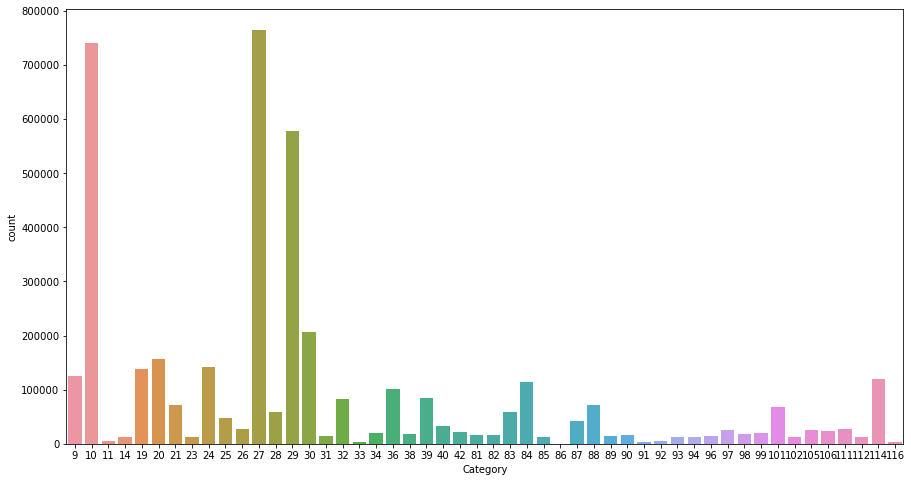

In [40]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train, x='Category')

In [41]:
cat_counts = pd.DataFrame(train['Category'].value_counts()).reset_index()

In [42]:
cat_counts['percent'] = cat_counts['Category'].apply(lambda x: x/cat_counts['Category'].sum())

In [43]:
cat_counts['percent'].sum()

1.0

<AxesSubplot:xlabel='index', ylabel='percent'>

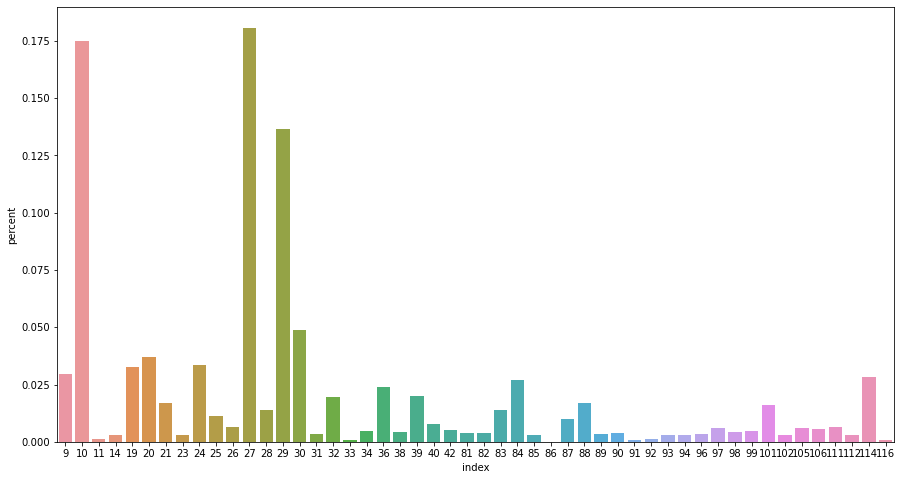

In [44]:
plt.figure(figsize=(15, 8))
sns.barplot(data=cat_counts, x='index', y='percent')

In [45]:
cat_sorted = cat_counts.sort_values(by='percent')
cat_sorted.columns = ['category', 'category count', 'category percent']
print('Категории, встречающиеся реже всех: ', '\n', cat_sorted.iloc[:3])
print('\n', 'Категории, встречающиеся чаще всех: ', '\n', cat_sorted.iloc[-3:])

Категории, встречающиеся реже всех:  
     category  category count  category percent
49        86             165          0.000039
48        33            2886          0.000682
47        91            3614          0.000854

 Категории, встречающиеся чаще всех:  
    category  category count  category percent
2        29          577499          0.136394
1        10          740701          0.174939
0        27          765120          0.180707


Самую большую долю имеют три категории: 27, 10 и 29 в порядке убывания. 27 класс встречается в 13.6 процентах объявлений. Самую маленьку долю имеют три категории: 91, 33 и 86 в порядке убывания. 86 класс встречается лишь в 0.0039 процентах объявлений. 

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
X_train = train[['title&description']]
y_train = train[['Category']]

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(train['title&description'])

In [47]:
bow

<4234042x2125805 sparse matrix of type '<class 'numpy.int64'>'
	with 150918485 stored elements in Compressed Sparse Row format>

Получилась матрица размером 4234042x2125805

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [48]:
df = pd.DataFrame(list(vec.vocabulary_.items()), columns = ['word', 'counts'])

In [49]:
df['is number'] = df['word'].apply(lambda x: x[0] in [str(i) for i in range(10)])

In [50]:
df.head(5)

,word,counts,is number
0,эбу,2102181,False
1,renault,983123,False
2,nissan,927024,False
3,dci,737115,False
4,delphi,739000,False


In [51]:
print('Words in total: ', df['is number'].shape[0], '\n', 'Words, started from number: ', df['is number'].sum())

Words in total:  2125805 
 Words, started from number:  610871


In [52]:
import string

df['is symbol'] = df['word'].apply(lambda x: x[0] in list(string.punctuation))

In [53]:
print('Words in total: ', df['is number'].shape[0], '\n', 'Words, started from symbol: ', df['is symbol'].sum())

Words in total:  2125805 
 Words, started from symbol:  2043


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

In [14]:
def my_tokenizer(s):
    s = str(s).lower()
    tokens = word_tokenize(s)
    tokens = set(tokens).difference(stopwords.words('russian'))
    tokens = list(filter(lambda x: re.match("^[a-zа-я]*$", x), tokens))
    
    stemmer = SnowballStemmer('russian')
    stemmed_tokens = [stemmer.stem(w) for w in tokens]

    return stemmed_tokens

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_tokenizer)

In [21]:
bow = vec.fit_transform(train['title&description'].head(1))
vec.get_feature_names()

['clio',
 'dci',
 'delphi',
 'kangoo',
 'laguna',
 'micra',
 'nissan',
 'renault',
 'автомобил',
 'аппаратур',
 'блок',
 'возможн',
 'гарант',
 'год',
 'двигател',
 'делф',
 'дета',
 'дизел',
 'документ',
 'дорож',
 'друг',
 'запчаст',
 'канг',
 'кли',
 'коммутатор',
 'компан',
 'комплект',
 'компьютер',
 'контрактн',
 'лагун',
 'легальн',
 'мега',
 'микр',
 'мозг',
 'мотор',
 'налич',
 'наложн',
 'нисса',
 'оригина',
 'отличн',
 'отправля',
 'платеж',
 'подробн',
 'предоставля',
 'пробег',
 'проверен',
 'раздел',
 'регион',
 'рен',
 'репутац',
 'росс',
 'сво',
 'состоян',
 'союз',
 'сценик',
 'таможен',
 'топливн',
 'торгу',
 'транспортн',
 'управлен',
 'установк',
 'эб',
 'электрон']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [22]:
train = train[['Category', 'title&description']]
r_data = train.sample(n = 100000)
r_data.head(5)

,Category,title&description
3583822,10,Блок управления климатом (печкой) Toyota Yaris...
1241139,36,Кронциркуль Кронциркуль с набором игл 17 шт.
2066008,10,Крыло Nissan Note (E11) 2006-2013 переднее лев...
2846946,27,Туфли женские Предлагаю женские туфли бежевого...
845342,29,Ветровка и штаны Gusti Комплект ветровка и шта...


In [23]:
import gc
del train
gc.collect()

208

In [ ]:
#r_data.to_csv(index=False)

In [24]:
bow = vec.fit_transform(r_data['title&description'])
bow

<100000x82368 sparse matrix of type '<class 'numpy.int64'>'
	with 2417527 stored elements in Compressed Sparse Row format>

In [25]:
matrix = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names())
y = r_data['Category']

MemoryError: Unable to allocate 61.4 GiB for an array with shape (100000, 82368) and data type int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
X_mtrain ,X_mtest, y_mtrain, y_mtest = train_test_split(matrix,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=False)

In [ ]:
scaler = MaxAbsScaler()
X_mtrain = scaler.fit_transform(X_mtrain)
X_mtest = scaler.transform(X_mtest)

In [ ]:
clf = SGDClassifier()
clf.fit(X_mtrain, y_mtrain)
y_pred = clf.predict(X_mtest)
print(accuracy_score(y_mtest, y_pred))

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(r_data['title&description'])

matrix = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names())

X_mtrain ,X_mtest, y_mtrain, y_mtest = train_test_split(matrix,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=False)

scaler = MaxAbsScaler()
X_mtrain = scaler.fit_transform(X_mtrain)
X_mtest = scaler.transform(X_mtest)

clf = SGDClassifier()
clf.fit(X_mtrain, y_mtrain)
y_pred = clf.predict(X_mtest)
print(accuracy_score(y_mtest, y_pred))

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1), max_df = 0.9)
bow = vec.fit_transform(r_data['title&description'])

matrix = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names())

X_mtrain ,X_mtest, y_mtrain, y_mtest = train_test_split(matrix,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=False)

scaler = MaxAbsScaler()
X_mtrain = scaler.fit_transform(X_mtrain)
X_mtest = scaler.transform(X_mtest)

clf = SGDClassifier()
clf.fit(X_mtrain, y_mtrain)
y_pred = clf.predict(X_mtest)
print(bow)
print(accuracy_score(y_mtest, y_pred))

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [1]:
 from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(n_features=30000)
bow = vec.fit_transform(r_data['title&description'])

matrix = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names())

X_mtrain ,X_mtest, y_mtrain, y_mtest = train_test_split(matrix,
                                                    y, test_size=0.2, 
                                                    random_state=42, shuffle=False)

scaler = MaxAbsScaler()
X_mtrain = scaler.fit_transform(X_mtrain)
X_mtest = scaler.transform(X_mtest)

clf = SGDClassifier()
clf.fit(X_mtrain, y_mtrain)
y_pred = clf.predict(X_mtest)
print(accuracy_score(y_mtest, y_pred))

NameError: name 'r_data' is not defined

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.